<a href="https://colab.research.google.com/github/seodalzzz/ESAA/blob/Exercises/TIMESERIESDATA_AppleStock_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [ ]:
apple=pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv')

### Step 4.  Check out the type of the columns

In [ ]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type

In [ ]:
apple=pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv',parse_dates=[0])

### Step 6.  Set the date as the index

In [ ]:
apple.index=apple['Date']
apple.index

DatetimeIndex(['2014-07-08', '2014-07-07', '2014-07-03', '2014-07-02',
               '2014-07-01', '2014-06-30', '2014-06-27', '2014-06-26',
               '2014-06-25', '2014-06-24',
               ...
               '1980-12-26', '1980-12-24', '1980-12-23', '1980-12-22',
               '1980-12-19', '1980-12-18', '1980-12-17', '1980-12-16',
               '1980-12-15', '1980-12-12'],
              dtype='datetime64[ns]', name='Date', length=8465, freq=None)

### Step 7.  Is there any duplicate dates?

In [ ]:
apple.index.is_unique

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [ ]:
apple=apple.sort_index()
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
1980-12-12,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Step 9. Get the last business day of each month

In [ ]:
pd.date_range(apple.index.min() , apple.index.max() , freq="M")

DatetimeIndex(['1980-12-31', '1981-01-31', '1981-02-28', '1981-03-31',
               '1981-04-30', '1981-05-31', '1981-06-30', '1981-07-31',
               '1981-08-31', '1981-09-30',
               ...
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30'],
              dtype='datetime64[ns]', length=403, freq='M')

### Step 10.  What is the difference in days between the first day and the oldest

In [ ]:
(apple['Date'].max()-apple['Date'].min()).days

12261

### Step 11.  How many months in the data we have?

In [ ]:
apple['Year']=apple['Date'].dt.year
apple['Month']=apple['Date'].dt.month

apple.groupby(['Year','Month']).count().info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 404 entries, (1980, 12) to (2014, 7)
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Date       404 non-null    int64
 1   Open       404 non-null    int64
 2   High       404 non-null    int64
 3   Low        404 non-null    int64
 4   Close      404 non-null    int64
 5   Volume     404 non-null    int64
 6   Adj Close  404 non-null    int64
dtypes: int64(7)
memory usage: 23.4 KB


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

(array([6451.,  543.,  375.,  142.,  185.,  164.,  151.,  202.,  175.,
          77.]),
 array([ 0.17 ,  9.781, 19.392, 29.003, 38.614, 48.225, 57.836, 67.447,
        77.058, 86.669, 96.28 ]),
 <a list of 10 Patch objects>)

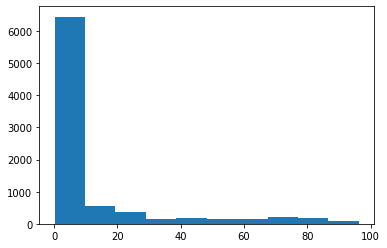

In [74]:
fig=plt.figure()
axes1=fig.add_subplot(1,1,1)
axes1.hist(apple['Adj Close'])

#apple['Adj Close'].plot()